<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
#считываем предварительно скачанный датасет
# df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

def panda_csv():
  #please change the file's URI
  df = pd.read_csv('https://firebasestorage.googleapis.com/v0/b/skillfactory-48451.appspot.com/o/dst-3.0_16_1_hh_database.csv?alt=media&token=dbde2591-ea6d-4548-be25-42ddd59821b6', sep=';')
  return df

# читаем датасет с внешнего источника данных
df = panda_csv()


df.shape

(44744, 12)

In [3]:
#копируем дата фрейм для исключения повторного скачивания и чтения
hh_df = df.copy()

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [4]:
hh_df.head(3)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [5]:
hh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [6]:
display(hh_df.isna().sum())

Пол, возраст                         0
ЗП                                   0
Ищет работу на должность:            0
Город, переезд, командировки         0
Занятость                            0
График                               0
Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Образование и ВУЗ                    0
Обновление резюме                    0
Авто                                 0
dtype: int64

5. Выведите основную статистическую информацию о столбцах.


In [7]:
display(hh_df.describe())

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [8]:
"""Создаем функцию принимающую на вход строку содержащую уровень образования"""
def get_education(occupation):
    occupation_words = occupation.split() # разбираем строку на слова
    if occupation_words[0][0] == 'В': # смотрим 1-ю букву 1-го слова
        return 'высшее'
    elif occupation_words[0][0] == 'Н': 
        return 'неоконченное высшее'
    elif occupation_words[0][0]=='С' and occupation_words[1][0]=='с': 
        return 'среднее специальное'
    else:
        return 'среднее'
    
"""Преобразуем данные"""
hh_df['Образование'] = hh_df['Образование и ВУЗ'].apply(get_education)
hh_df.drop('Образование и ВУЗ', axis=1, inplace=True) 

"""Ответы на вопросы"""
display(hh_df['Образование'].value_counts()) # выводим кол-во человек по категориям образования
display(hh_df['Образование'].unique()) #  проверяем количество категорий

высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: Образование, dtype: int64

array(['неоконченное высшее', 'высшее', 'среднее специальное', 'среднее'],
      dtype=object)

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [9]:
"""Преобразование данных"""
hh_df['Пол'] = hh_df['Пол, возраст'].apply(lambda x: x[0])
hh_df['Возраст'] = hh_df['Пол, возраст'].apply(lambda x: 
    int((x.split(sep=',')[1]).split()[0]))
hh_df.drop('Пол, возраст', axis=1, inplace=True)

"""ответы на вопросы"""
mask_female = hh_df['Пол'] == 'Ж'
print(round((hh_df[mask_female].shape[0]/hh_df.shape[0]) * 100, 2)) # процент женщин
print(round(hh_df['Возраст'].mean(), 1)) # средний возраст кандидата

19.07
32.2


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [10]:
"""Создаем функцию перевода опыта работы в месяцы"""
def get_experience(experience):    
    if experience is np.NaN or experience == 'Не указано' : # если NaN или "Не указано"
        return np.NaN
    experience_words = experience.split()
    if experience_words[3][0:5] == 'месяц':   # опыт работы только месяцы
        return int(experience_words[2])
    elif experience_words[5][0:5] == 'месяц': # опыт состоить из лет и месяцев
        return int(experience_words[2])*12 + int(experience_words[4])
    else:                            # опыт работы только годы
        return int(experience_words[2]) * 12
    
    
"""Преобразуем данные"""
hh_df['Опыт работы (месяцев)'] = hh_df['Опыт работы'].apply(get_experience)
hh_df.drop('Опыт работы', axis=1, inplace=True)

"""Ответ на вопрос"""
hh_df['Опыт работы (месяцев)'].median() # медиана опыта работы

100.0

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [11]:
"Создаем функцию которая возвращает название города"
def get_city(location):
    million_cities = [
        'Новосибирск', 'Екатеринбург', 'Нижний Новгород', 
        'Казань', 'Челябинск', 'Омск', 'Самара',          
        'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 
        'Воронеж', 'Волгоград'
    ]
    city = location.split()[0]
    if city == 'Москва':
        return 'Москва'
    elif city == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    elif city in million_cities:
        return 'город миллионник'
    else:
        return 'другие'


"Создаем функцию которая возвращает индикатор готовность к переезду"
def get_migration(migration):
    check_1 = re.search(r'не готов к переезду', migration)
    check_2 = re.search(r'не готова к переезду', migration)
    if check_1 or check_2: # если не готов(а)
        return False
    else:                      # иначе:
        return True


"Создаем функцию которая возвращает признак готовности к командировкам"
def get_business_trip(trip):
    check_1 = re.search(r'не готов к командировкам', trip)
    check_2 = re.search(r'не готова к командировкам', trip)
    if check_1 or check_2: # если не готов(а)
        return False
    else:                      # иначе:
        return True    


"""Преобразует данных"""
hh_df['Город'] = hh_df['Город, переезд, командировки'].apply(get_city)
hh_df['Готовность к переезду'] \
    = hh_df['Город, переезд, командировки'].apply(get_migration)
hh_df['Готовность к командировкам'] \
    = hh_df['Город, переезд, командировки'].apply(get_business_trip)
hh_df.drop('Город, переезд, командировки', axis=1, inplace=True)

"""Ответы на вопросы"""
mask_city = hh_df['Город'] == 'Санкт-Петербург'
mask_migrat = hh_df['Готовность к переезду']
mask_trip = hh_df['Готовность к командировкам']
# Процент жителей Санкт-Петербурга:
print(round(hh_df[mask_city].shape[0] / hh_df.shape[0] * 100))
# Процент готовых одновременно к переезду и командировкам:
print(round(hh_df[mask_migrat & mask_trip].shape[0] / hh_df.shape[0] * 100))

11
32


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://lms.skillfactory.ru/assets/courseware/v1/5461aeb8c39a8cb9731eb5f52b66f5a3/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-3.0_16_3_1.png>

Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы


In [12]:
"Создаем функцию разбивающую графу занятость на серию индикаторов"
def get_employment(employment):
    kinds = employment.split(sep=', ') # желаемые типы занятости
    full = True if 'полная занятость' in kinds else False
    part = True if 'частичная занятость' in kinds else False
    project = True if 'проектная работа' in kinds else False
    intern = True if 'стажировка' in kinds else False
    volunteer = True if 'волонтерство' in kinds else False
    return [full, part, project, intern, volunteer] # возвращаем список индикаторов True/False


"Создаем функцию разбивающую графу график на серию индикаторов"
def get_schedule(shedule):
    kinds = shedule.split(sep=', ') # желаемый график работы 
    full = True if 'полный день' in kinds else False
    shift = True if 'сменный график' in kinds else False
    flex = True if 'гибкий график' in kinds else False
    fly = True if 'вахтовый метод' in kinds else False
    remote = True if 'удаленная работа' in kinds else False
    return [full, shift, flex, fly, remote] # возвращаем список индикаторов False/True


"""Преобразование данных по типу занятости (One Hot Encoding)"""
employment_data = hh_df['Занятость'].apply(get_employment) # получаем pd.Series со списками
employment_df = pd.DataFrame(                                # создаем новый DataFrame с индикаторами
    data=list(employment_data),
    columns=['Полная занятость', 'Частичная занятость', 
             'Проектная работа', 'Стажировка', 'Волонтерство'])
hh_df = pd.concat([hh_df, employment_df], axis=1)        # склеиваем две таблицы вместе по столбцам
hh_df.drop('Занятость', axis=1, inplace=True) # удаляем колонку занятость

"""Преобразование данных по графику работы (One Hot Encoding)"""
schedule_data = hh_df['График'].apply(get_schedule) # получаем pd.Series со списками
schedule_df = pd.DataFrame(                         # создаем новый DataFrame с индикаторами
    data=list(schedule_data),
    columns=['Полный день', 'Сменный график', 
             'Гибкий график', 'Вахтовый метод', 'Удаленная работа'])
hh_df = pd.concat([hh_df, schedule_df], axis=1)   # склеиваем две таблицы вместе по столбцам
hh_df.drop('График', axis=1, inplace=True)

"""Ответы на вопросы"""
mask_project = hh_df['Проектная работа']
mask_volunteer = hh_df['Волонтерство']
mask_fly = hh_df['Вахтовый метод']
mask_flex = hh_df['Гибкий график']

# соискатели ищущие и  проектную работу и волонтёрство:
print(hh_df[mask_project & mask_volunteer].shape[0]) 
# соискатели могут работать вахтовым методом и с гибким графиком:
print(hh_df[mask_fly & mask_flex].shape[0]) 

436
2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=data/exchange_exa.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [13]:
# таблица с курсами валют на дату резюме
exchange_rates = pd.read_csv('data/ExchangeRates.csv')

"""Преобразование данных"""
# to datetime
hh_df['Обновление резюме'] \
    = pd.to_datetime(hh_df['Обновление резюме'])
hh_df['Дата'] = hh_df['Обновление резюме'].dt.date # оставляем только дату
hh_df['Дата'] = pd.to_datetime(hh_df['Дата'])
exchange_rates['date'] = pd.to_datetime(exchange_rates['date'])

# Получаем величины (value) и валюты (currency) ЗП
hh_df['value'] = hh_df['ЗП'].apply(lambda x: x.split()[0])
hh_df['currency'] = hh_df['ЗП'].apply(lambda x: x.split()[1])
replace_dict = {'грн.': 'UAH', 'бел.руб.': 'BYN', 'сум':'UZS'} # в ISO
hh_df['currency'].replace(to_replace=replace_dict, inplace=True)

# Курс обмена валют на дату резюме (слияние таблиц)
exchange_rates = exchange_rates[['currency', 'date', 'close', 'proportion']]
hh_df = hh_df.merge(
    exchange_rates, 
    how='left',
    left_on=['Дата', 'currency'], 
    right_on=['date', 'currency']
)
hh_df['close'].fillna(1, inplace=True)      # для руб. курс = 1
hh_df['proportion'].fillna(1, inplace=True) # для руб. пропорция = 1

# Пересчет ЗП в рубли
hh_df['value'] = hh_df['value'].astype(float)
hh_df['ЗП (руб)'] = hh_df['close'] / hh_df['proportion'] * hh_df['value']

# Очистка
hh_df.drop(['Обновление резюме', 'ЗП', 'date', 'value', 'currency', 
    'close', 'proportion'], axis=1, inplace=True)

"""Ответы на вопросы"""
round(hh_df['ЗП (руб)'].median() / 1000) # медианная зарплата в тысячах

59

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения,\
 каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? \
 Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?\
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

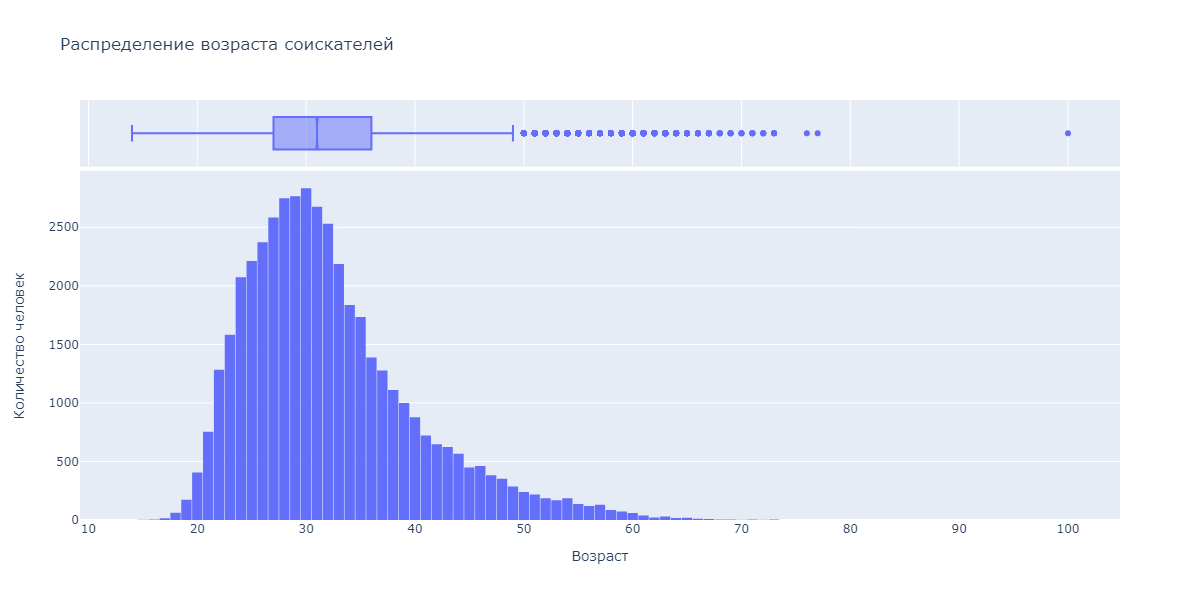

In [14]:
fig = px.histogram(
    hh_df,
    x='Возраст',
    title='Распределение возраста соискателей',
    marginal='box',
    width=1200,
    height=600                  
)
fig.layout.yaxis.title.text = 'Количество человек'
fig.layout.bargap = 0.05
fig.show('png')

### Выводы

- Мода распределения составляет 30 лет.
- Возраст соискателей варьируется от 14 до 100 лет.
- Большая часть  сосискателей находится в возрасте от 23 до 36 лет (оценивая по половине высоты распределения в 1500 человек).
- Распределение имеет вид логнормального. 
- Возраст 100 лет скорее всего является выбросомю.
- Наблюдается плавный спад числа  соискателей после 35 лет.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: \
чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства\
 соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?\
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

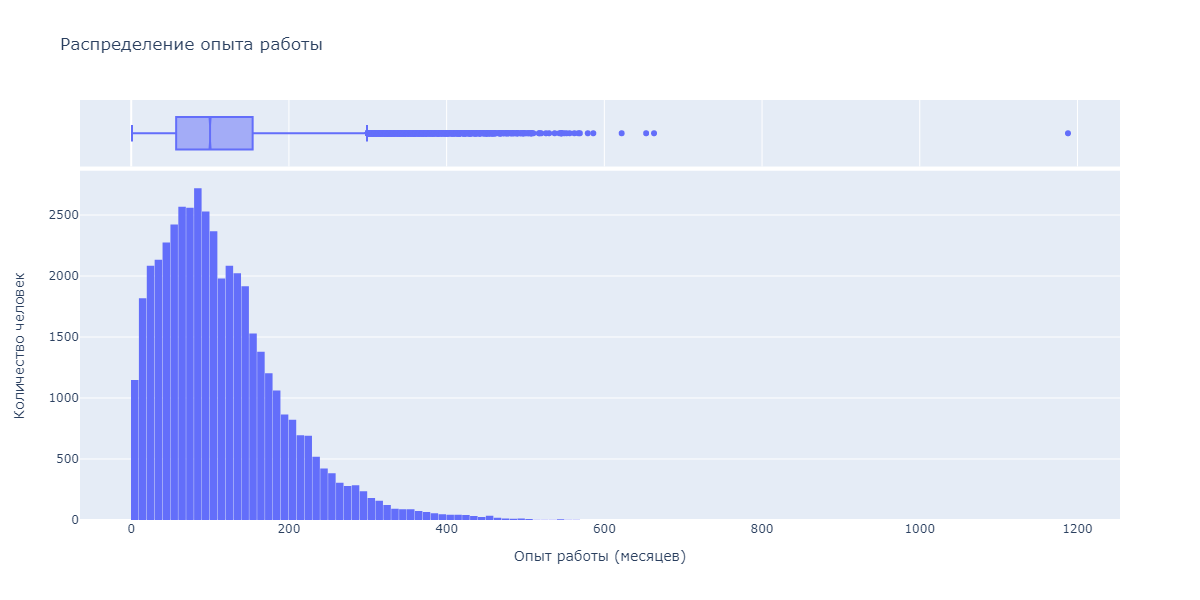

In [15]:
fig = px.histogram(
    hh_df,
    x='Опыт работы (месяцев)',
    title='Распределение опыта работы',
    nbins=150,
    marginal='box',
    width=1200,
    height=600                  
)
fig.layout.yaxis.title.text = 'Количество человек'
fig.layout.bargap = 0.05
fig.show('png')
# fig.write_image('data/experience.png')

### Выводы

- мода распределения приходится на 80-90 месяцев (примерно 7 лет стажа)
- опыт работы варьируется от 0 до 1188 месяцев
- большая часть соискателей имеет опыт работы от  года до 12 лет (принимая во внимание половину высоты распределения) 
- распределение похоже на логнормальное
- значение 1188 месяцев однозначно можно считать выбросом. Следующие значение по величене  663 месяца ( около 55 лет) можно считать  фактическеским

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака ЗП? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


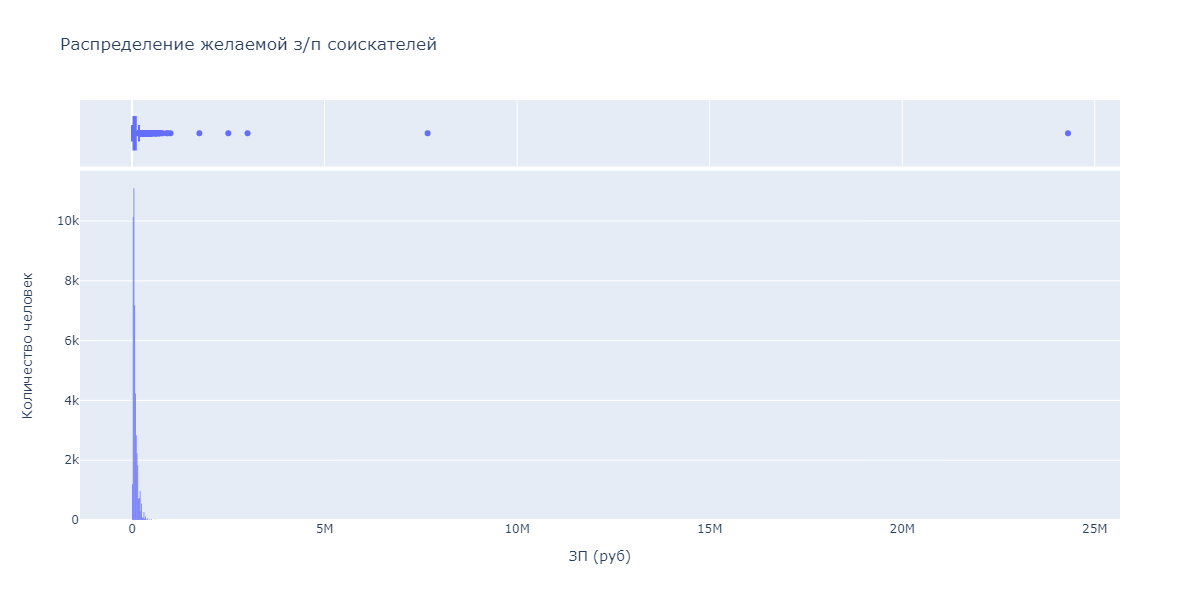

In [16]:
fig = px.histogram(
    hh_df,
    x='ЗП (руб)',
    title='Распределение желаемой з/п соискателей',
    nbins=1500,
    marginal='box',
    # range_x=[0, 1_020_000],
    width=1200,
    height=600                  
)
fig.layout.yaxis.title.text = 'Количество человек'
fig.layout.bargap = 0.05
fig.show('png')


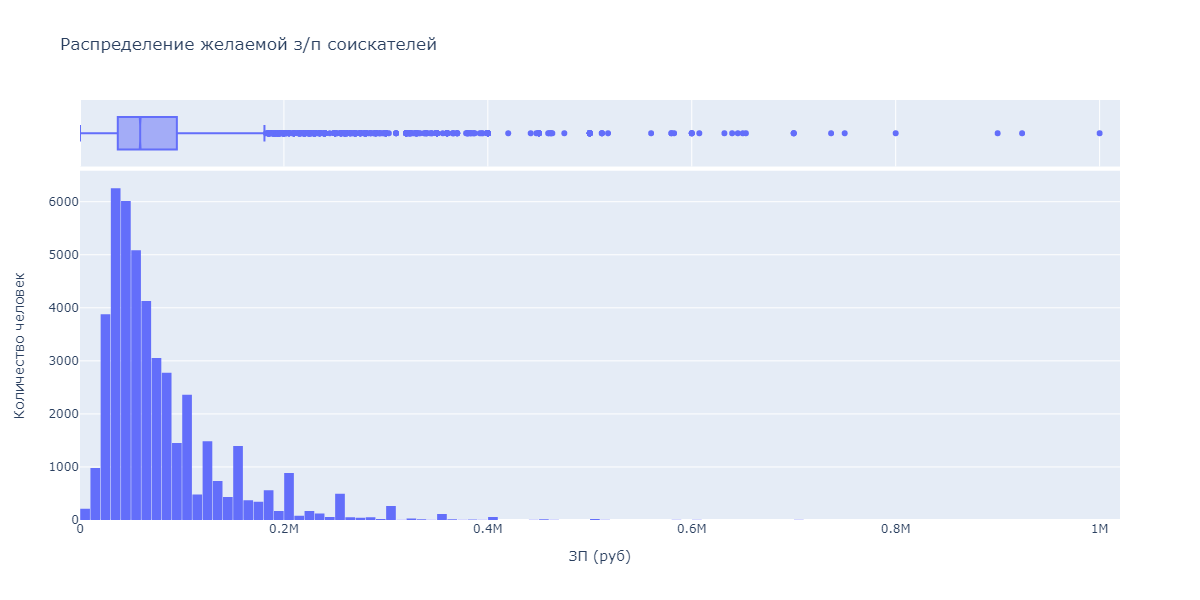

In [17]:
fig = px.histogram(
    hh_df,
    x='ЗП (руб)',
    title='Распределение желаемой з/п соискателей',
    nbins=3000,
    marginal='box',
    range_x=[0, 1_020_000],#отсекаем на хистограме самые экстремальные значения
    width=1200,
    height=600                  
)
fig.layout.yaxis.title.text = 'Количество человек'
fig.layout.bargap = 0.05
fig.show('png')

### Выводы


- желаемая заработная плата колеблется от 1 рубля до 24.3 млн рублей
- мода распределения находится в диапазоне 30-40 тысячь рублей, большинство соискателей ищут зарплату в дипазоне от 20 до 80 тысячь рублей
- распределение похоже на логнормальное. Оно плавно нисходит к значению 0.5 млн руб           
- присутствует пять аномально больших значений заработной платы выше 1 млн руб., которые можно считать выбросами так как \
они сильно отстоят от остальных точек рапсределения
- также аномальными можно считать зарплаты ниже 1 тысячи рублей, так как эти  цифры выглядят нереально низкими

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). \
Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.\
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие\ и наименьшие уровни желаемой заработной платы?\
 Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

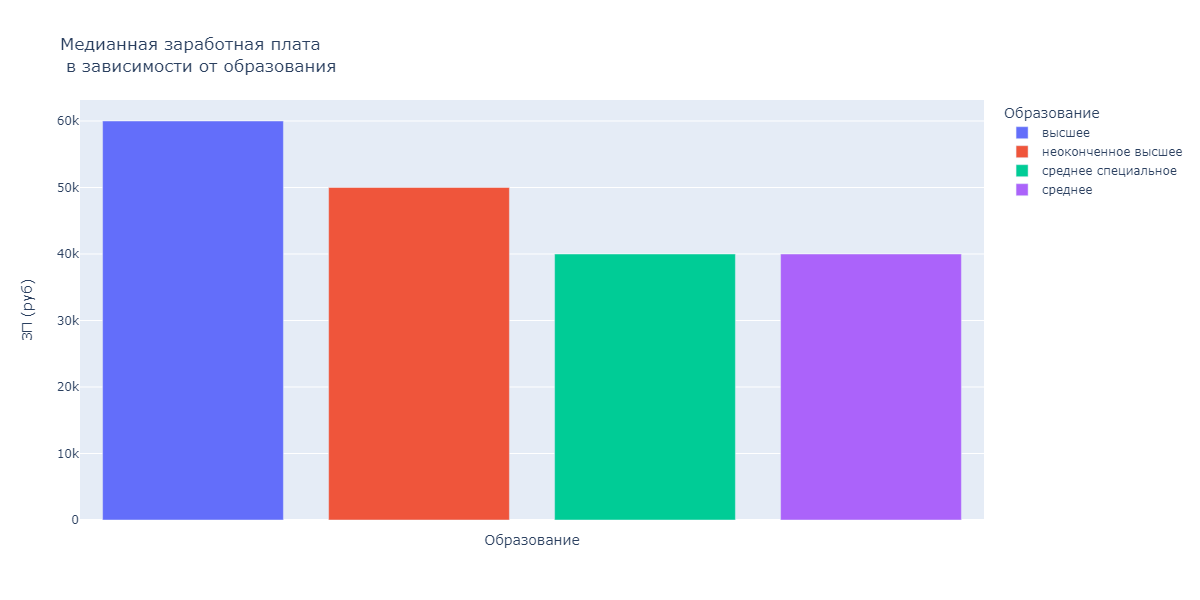

In [18]:
salary_below_million = hh_df['ЗП (руб)'] < 1_000_000 # фильтруем выбросы
plot_df = hh_df[salary_below_million].groupby('Образование', as_index=False)['ЗП (руб)'].median()

fig = px.bar(
    plot_df,
    x='Образование',
    y='ЗП (руб)',
    color='Образование',
    category_orders={'Образование': ['высшее', 'неоконченное высшее', 
                                     'среднее специальное', 'среднее']},
    title='Медианная заработная плата <br> в зависимости от образования',
    width=1200,
    height=600 
)
fig.layout.xaxis.showticklabels = False
fig.show('png')

### Выводы

- желаемая заработная плата в целом коррелирует с уровнем образования, соискатели с высшим образованием в среднем требуют наиболее более высокую зарплату
- требования соискателей со средним и средним специальным образованием не отличаются, эти две группы требуют наименьшую зарплату
- средние величины зарплат требуют соискатели с неоконченным высшим образованием

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). \
Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей. \
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? \
Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

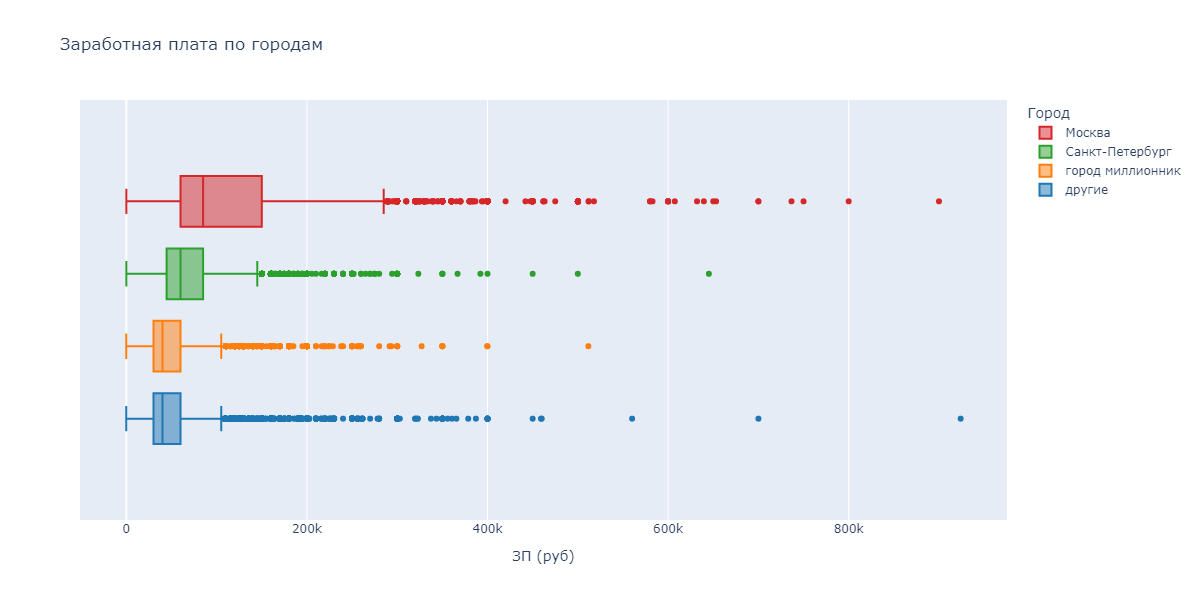

In [19]:
fig = px.box(
    hh_df[salary_below_million], 
    x='ЗП (руб)',
    color='Город',
    color_discrete_sequence=px.colors.qualitative.D3,
    category_orders={'Город': ['другие', 
        'город миллионник', 'Санкт-Петербург', 'Москва']},
    title='Заработная плата по городам',
    width=1200,
    height=600
)
fig.layout.legend.traceorder = 'reversed'
fig.write_image('data/salary_city.png')
fig.show('png')

### Вывод

- медианный уровень желаемой заработной платы и размах границ распределения (1.5 IQR) больше всего в Москве (медианная зарплата 85 т.р., верхняя граница 285 т.р.)
- затем идет Санкт-Петербург (60 т.р. и 145 т.р. соответственно)
- города-миллионники и менее населенные города фактически не отличаются по  показателям ожидаемой зарплаты:\
 медиана 40 т.р., верхняя граница 105 т.р
- в модели необходимо учитывать признак города

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

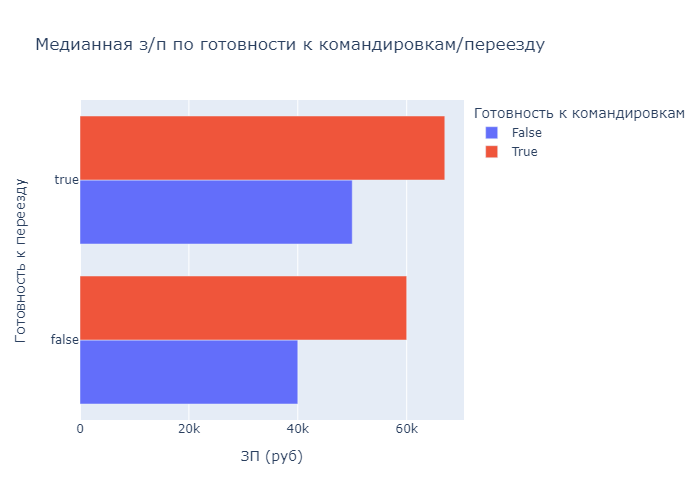

In [20]:
bar_data = hh_df.groupby(
    ['Готовность к командировкам', 'Готовность к переезду'],
    as_index=False
)['ЗП (руб)'].median()
fig = px.bar(
    data_frame=bar_data,
    y='Готовность к переезду',
    x='ЗП (руб)',
    barmode="group",
    color='Готовность к командировкам',
     title='Медианная з/п по готовности к командировкам/переезду'
)
fig.show('png')

### Вывод

- ожидаемая заработная плата растет при готовности к командирвкам
- готовность к переезду так же увеличивает зарплатные ожидания соискателей

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

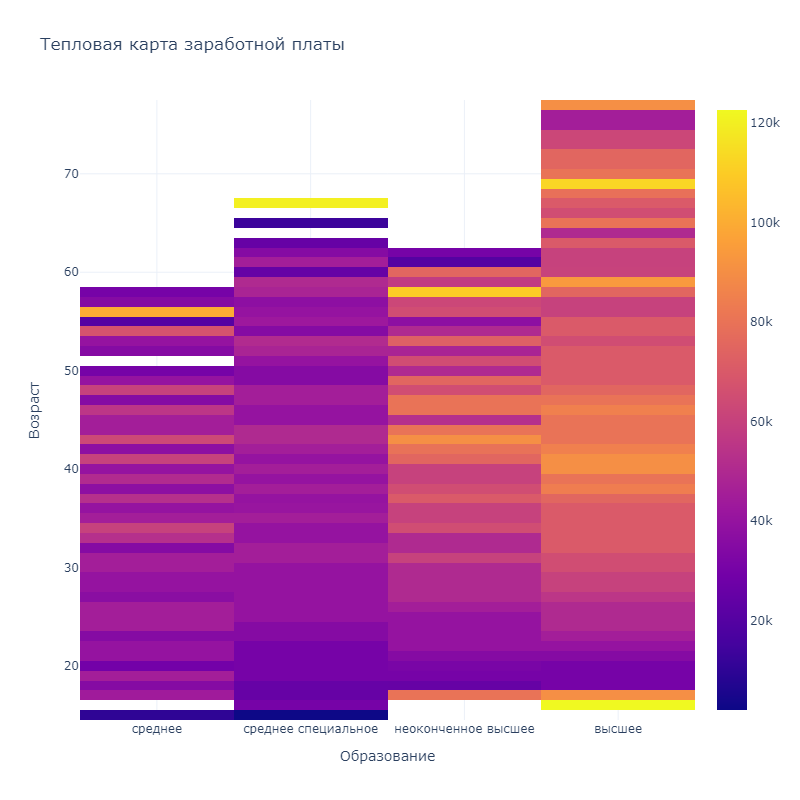

In [21]:
mask = (hh_df['Возраст']>14) & (hh_df['Возраст']<100) # фильтруем выбросы по выше обозначенным границам
plot_df = pd.pivot_table(
    hh_df[mask],
    values='ЗП (руб)',
    index='Возраст',
    columns='Образование',
    aggfunc='median'                             
)
plot_df = plot_df[['среднее', 'среднее специальное', 
    'неоконченное высшее', 'высшее']] # перестраиваем в порядке роста

fig = px.imshow(
    plot_df,
    origin='lower',
    title='Тепловая карта заработной платы',
    width=800,
    height=800
)
fig.update_layout(template='plotly_white')
fig.write_image('data/salary_heatmap.png')
fig.show('png')

### Вывод

- более высокие заработные платы наблюдаються у сосискателей с вышим и неоконченным высшим образованием
- соискатели с высшим образованием  продолжают поиски работы дольше  сосискателей из других категорий (встречаются люди 65 +)
- в средней категорией зарплатные ожидания с возрастом растут не сильно в отличие от соискателей с высшим образованием

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

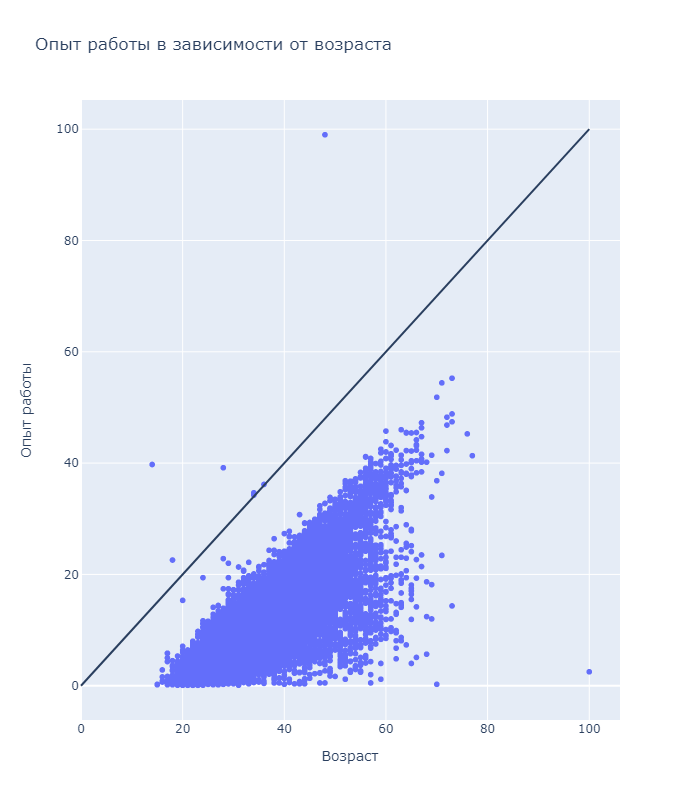

In [22]:
plot_df = hh_df[['Опыт работы (месяцев)', 'Возраст']]
plot_df = plot_df.copy()
plot_df['Опыт работы'] = plot_df['Опыт работы (месяцев)'] / 12
 
fig = px.scatter(
    plot_df,
    y='Опыт работы',
    x='Возраст',
    title='Опыт работы в зависимости от возраста',
    height=800 
)
fig.add_shape(type="line", x0=0, y0=0, x1=100, y1=100)
fig.write_image('data/age_experience.png')
fig.show('png')

# Выводы
- "зазор" между распределение и прямой линией говорит являеться дельтой между рождением (0) и началом трудовой деятельности (16-17 лет)
- точки выше прямой являються явно выбросами, так как очевидно, что стаж не может быть равен или уж тем более больше возраста 

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [23]:
clean_data = hh_df.copy() # создаем копию для очистки
mask = clean_data.duplicated()
duplicates = clean_data[mask]
print(f'Число дубликатов: {duplicates.shape[0]}')
clean_data.drop_duplicates(inplace=True)

Число дубликатов: 161


In [24]:
duplicates = hh_df[hh_df.duplicated(subset=hh_df.columns)]
clean_hh_df = hh_df.drop_duplicates()
print(duplicates.shape[0])

161


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [25]:
clean_hh_df.isnull().sum()

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяцев)              168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
Полная занятость                     0
Частичная занятость                  0
Проектная работа                     0
Стажировка                           0
Волонтерство                         0
Полный день                          0
Сменный график                       0
Гибкий график                        0
Вахтовый метод                       0
Удаленная работа                     0
Дата                                 0
ЗП (руб)                             0
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [26]:
clean_hh_df = clean_hh_df.dropna(
    subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность']
)
clean_hh_df = clean_hh_df.fillna(
    {'Опыт работы (месяцев)': clean_hh_df['Опыт работы (месяцев)'].median()}
)

round(clean_hh_df['Опыт работы (месяцев)'].mean()) # среднее значение опыта работы

114

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [27]:
mask_salary_outside = (clean_hh_df['ЗП (руб)']>1e6) | (clean_hh_df['ЗП (руб)']<1e3)
print(f'Количество выбросов {clean_hh_df[mask_salary_outside].shape[0]}')
mask_salary = (clean_hh_df['ЗП (руб)']<=1e6) & (clean_hh_df['ЗП (руб)']>=1e3)
clean_hh_df = clean_hh_df[mask_salary]

Количество выбросов 89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [28]:
clean_hh_df_final = clean_hh_df.copy()
clean_hh_df_final['exper_to_age'] \
    = (clean_hh_df['Опыт работы (месяцев)'] / 12 )/ clean_hh_df['Возраст']
mask_out = clean_hh_df_final['exper_to_age'] > 1 # Опыт работы превышает возраст
print(f'Количество выбросов {clean_hh_df_final[mask_out].shape[0]}')
mask = clean_hh_df_final['exper_to_age'] <= 1 # Опыт работы не превышает возраст
clean_hh_df_final = clean_hh_df_final[mask]
clean_hh_df_final.drop('exper_to_age', axis=1, inplace=True)
clean_hh_df = clean_hh_df_final.copy()

Количество выбросов 7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

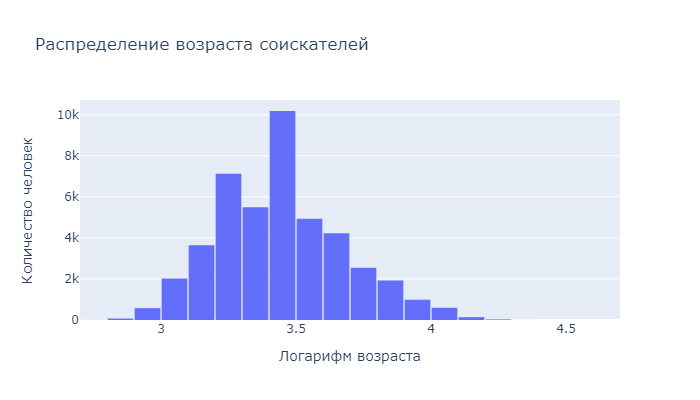

In [34]:
"""Распределение возраста в логарифмическом масштабе"""
clean_hh_df['Логарифм возраста'] = np.log(clean_hh_df['Возраст'])

fig = px.histogram(
    clean_hh_df,
    x='Логарифм возраста',
    title='Распределение возраста соискателей',
    nbins=20,
    width=700,
    height=400                  
)
fig.layout.yaxis.title.text = 'Количество человек'
fig.layout.bargap = 0.05
# fig.write_image('data/log_age.png')
fig.show('png')

In [36]:
def drop_zscore(df, col, log_scale=False, add_one=False, left=3, right=3):
    
    if log_scale and add_one:
        x = np.log(df[col]+1)
    elif log_scale and not add_one:
        x = np.log(df[col])
    else:
        x = df[col]
    
    mean_val = x.mean()
    sigma = x.std()
    lower_bound = mean_val - left*sigma
    upper_bound = mean_val + right*sigma
    outliers = df[(x<lower_bound) | (x>upper_bound)]
    clean_df = df[(x>=lower_bound) & (x<=upper_bound)]
    
    return clean_df, outliers


# Асимметрия левая - убираем отклонения больше 3 sigma слева, 4 sigma справа
clean_hh_df, outlied = drop_zscore(clean_hh_df, 'Возраст', log_scale=True, right=4)
print(f'Количество выбросов: {outlied.shape[0]}')

Количество выбросов: 3


In [37]:
outlied

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Авто,Образование,Пол,Возраст,Опыт работы (месяцев),Город,Готовность к переезду,...,Стажировка,Волонтерство,Полный день,Сменный график,Гибкий график,Вахтовый метод,Удаленная работа,Дата,ЗП (руб),Логарифм возраста
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,Не указано,среднее,М,15,2.0,Санкт-Петербург,False,...,False,False,False,True,True,False,True,2019-06-04,10000.0,2.70805
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,Не указано,среднее специальное,М,15,3.0,другие,False,...,False,False,True,False,False,False,False,2019-09-04,2000.0,2.70805
33654,Frontend-разработчик,Freelance,Frontend-разработчик,Не указано,среднее специальное,М,100,30.0,Санкт-Петербург,False,...,True,False,True,False,True,False,True,2019-04-19,60000.0,4.60517


Можно утверждать что выбросы по возрастам тяготеют стремятся к возрасту в 100 лет